<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9: Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Input data

In [ ]:
# Input array
X = np.array([
  [1, 0, 1, 0],
  [1, 0, 1, 1],
  [0, 1, 0, 1]
])

# Output
y = np.array([
  [1],
  [1],
  [0]
])

In [ ]:
#new set of data
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

## Functions

In [ ]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

## Variable initialization

In [ ]:
# Setting training iterations
epoch = 1000  #one epoch represents forward and back propagation of all the data once
# Setting learning rate 
lr = 0.1
# number of features in data set
input_layer_size = X.shape[1] #input size = 4 cause you have 4 features
# number of hidden layers neurons
hidden_layer_1_size = 3 #3 neurons in the hidden layer 
# number of neurons at output layer
output_layer_size = 1 #label

### Weights and Bias

In [ ]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size))
bh1 = np.random.uniform(size = (1, hidden_layer_1_size))
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size))
bout = np.random.uniform(size = (1, output_layer_size))

## Calculation

In [ ]:
cost = []
for i in range(epoch):
    # Forward Propagation
    hidden_layer_1 = np.dot(X, wh1)
    hidden_layer_1 = hidden_layer_1 + bh1
    hidden_layer_1_activation = sigmoid(hidden_layer_1)
    
    output_layer = np.dot(hidden_layer_1_activation, wout)
    output_layer = output_layer + bout
    
    output = sigmoid(output_layer)

    # Backpropagation
    E = y - output
    cost.append(np.square(E).sum())
    
    slope_output_layer = sigmoid_derivative(output)
    d_output = E * slope_output_layer
    
    error_hidden_layer_1 = d_output.dot(wout.T)
    slope_hidden_layer_1 = sigmoid_derivative(hidden_layer_1_activation)
    d_hidden_layer_1 = error_hidden_layer_1 * slope_hidden_layer_1
    
    wout += hidden_layer_1_activation.T.dot(d_output) * lr
    bout += np.sum(d_output,  axis = 0, keepdims = True) * lr
    wh1 += X.T.dot(d_hidden_layer_1) * lr
    bh1 += np.sum(d_hidden_layer_1,  axis = 0, keepdims = True) * lr
    print('epoch: {}, cost: {}'.format(i,np.square(E).sum()))

epoch: 0, cost: 0.6887872812979318
epoch: 1, cost: 0.6857361786117276
epoch: 2, cost: 0.6827539647719695
epoch: 3, cost: 0.6798433741493884
epoch: 4, cost: 0.6770068008785469
epoch: 5, cost: 0.6742462857242579
epoch: 6, cost: 0.6715635070275989
epoch: 7, cost: 0.6689597758168531
epoch: 8, cost: 0.6664360350791413
epoch: 9, cost: 0.6639928631009664
epoch: 10, cost: 0.6616304807032537
epoch: 11, cost: 0.6593487621214091
epoch: 12, cost: 0.6571472492156218
epoch: 13, cost: 0.6550251686428314
epoch: 14, cost: 0.6529814515805983
epoch: 15, cost: 0.6510147555651316
epoch: 16, cost: 0.6491234879909205
epoch: 17, cost: 0.6473058308172925
epoch: 18, cost: 0.6455597660367811
epoch: 19, cost: 0.6438831014801073
epoch: 20, cost: 0.6422734965612844
epoch: 21, cost: 0.6407284876020635
epoch: 22, cost: 0.6392455124158383
epoch: 23, cost: 0.6378219338754412
epoch: 24, cost: 0.6364550622352673
epoch: 25, cost: 0.6351421760243403
epoch: 26, cost: 0.6338805413719332
epoch: 27, cost: 0.6326674296700705
ep

## Results

In [ ]:
ii = range(len(y))
yy = y.flatten()
oo = output.flatten()
ab = np.abs(oo - yy)
bo = np.array([0 if oi < 0.5 else 1 for oi in oo])
tt = ['Yes' if ti else 'No' for ti in (yy == bo)]

print('index Expect Output Error Binary Correct')
print('----- ------ ------ ----- ------ -------')
ima = int((0.9 * len(yy)))
imi = len(yy) - ima
dots = False
for i, a, b, c, d, e in zip(ii, yy, oo, ab, bo, tt):
    #if (i < imi) | (i > ima):
    print(' %3d     %d    %.2f   %.2f    %d     %s' % (i, a, b, c, d, e))
    #else:
    #    if dots:
    #        print(' ...')
    #        dots = False
aa = (yy == bo).sum() / len(yy)
print('\nCost Minimum: %.4f' % min(cost))
print('Accuracy    : %.2f' % aa)

index Expect Output Error Binary Correct
----- ------ ------ ----- ------ -------
   0     1    0.94   0.06    1     Yes
   1     1    0.91   0.09    1     Yes
   2     0    0.11   0.11    0     Yes

Cost Minimum: 0.0237
Accuracy    : 1.00


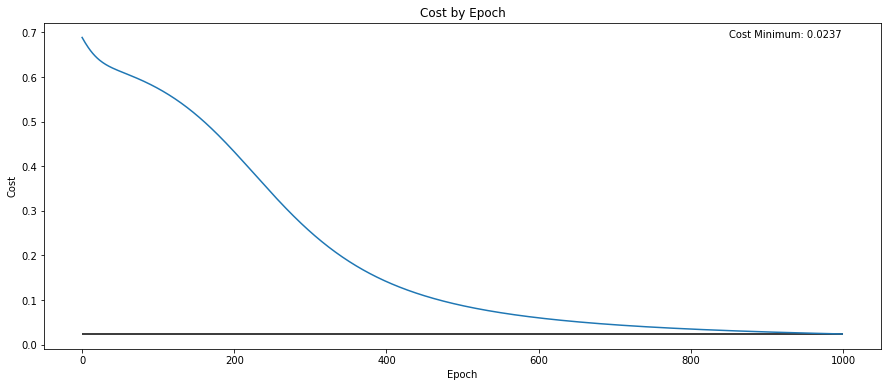

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(cost)
plt.hlines(min(cost), 0, epoch)
plt.text(epoch - 150, max(cost), 'Cost Minimum: %.4f' % min(cost))
plt.title('Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Create new data and re-run
Create new data and re-run from **Weights and Bias**.

In [ ]:
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

In [ ]:
y

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



